Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Data Selection

In [2]:
df_jantung = pd.read_csv("Data_Poli_Jantung.csv", encoding="latin1")
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,KEL UMUR,JKEL,L,P,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,5-14th,P,NaN,12 Th,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,5-14th,P,NaN,14 Th,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,15-24th,P,NaN,17 Th,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,15-24th,P,NaN,20 Th,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,15-24th,P,NaN,21 Th,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN


In [3]:
# Buat kolom baru 'UMUR' berdasarkan jenis kelamin
df_jantung["UMUR"] = df_jantung.apply(lambda row: row["L"] if row["JKEL"] == "L" else row["P"], axis=1)

# Hapus kolom L dan P setelah penggabungan
df_jantung = df_jantung.drop(columns=["L", "P", "KEL UMUR"])

# Cek hasil perubahan
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,JKEL,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN,UMUR
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,P,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,12 Th
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,P,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,14 Th
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,P,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,17 Th
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,P,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,20 Th
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,P,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,21 Th


In [4]:
# Fungsi untuk memberi label penyakit jantung (1) atau bukan (0)
def label_penyakit(diagnosa):
    diagnosa = str(diagnosa)  # Pastikan format string
    if "(I" in diagnosa:  # Jika kode penyakit diawali dengan 'I' (penyakit jantung)
        return 1
    return 0  # Selain itu dianggap bukan penyakit jantung

# Tambahkan kolom label ke DataFrame
df_jantung["LABEL"] = df_jantung["DIAGNOSA"].apply(label_penyakit)

# Cek distribusi label
df_jantung["LABEL"].value_counts()
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,JKEL,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN,UMUR,LABEL
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,P,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,12 Th,1
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,P,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,14 Th,0
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,P,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,17 Th,0
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,P,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,20 Th,0
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,P,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,21 Th,1


In [5]:
# Ekstrak kode penyakit dari kolom DIAGNOSA
df_jantung["KODE_PENYAKIT"] = df_jantung["DIAGNOSA"].str.extract(r'(\w\d+\.\d+|\w\d+)')

# Tampilkan semua kode penyakit (termasuk duplikat)
print(df_jantung["KODE_PENYAKIT"])

# Jika hanya ingin melihat kode unik (tanpa duplikat)
kode_unik = df_jantung["KODE_PENYAKIT"].dropna().unique()
print(kode_unik)

0       I09.9
1       R06.0
2       Q25.8
3       Z09.8
4         I50
        ...  
5916    Z09.8
5917    I50.0
5918    Z09.8
5919    Z09.8
5920      NaN
Name: KODE_PENYAKIT, Length: 5921, dtype: object
['I09.9' 'R06.0' 'Q25.8' 'Z09.8' 'I50' 'E05' 'I27.0' 'I10' 'I26.0' 'I50.0'
 'N18.9' 'Z09.7' 'R00.2' 'I49.5' 'I49.9' 'I35.1' 'I25.1' 'I48' 'I05.1'
 'R00.1' 'I11.0' 'J91' 'I20' 'I50.9' 'I34.0' 'A15.0' 'I25' 'I11' 'I11.9'
 'I47.1' 'R00.0' 'P23.9' 'S49.9' 'K62' 'I25.0' 'M17' 'E11' 'Z71.9' 'Z95.5'
 'I51.7' 'I20.0' 'I09.8' 'I51' 'N81.2' 'I05.0' 'I15.8' 'R07.4' 'I20.9'
 'R57' 'Q21.0' 'Q21.1' 'F32' 'Z00.0' 'I34.1' 'I65.2' 'I22.8' 'I21.9'
 'I21.1' 'I24.9' 'I25.9' 'I21.3' 'Z95.8' 'N40' 'I27.2' 'D30.0' 'I21' 'I15'
 'I15.0' 'I26.9' 'O99.4' 'I09' 'R55' 'E78.4' 'I49.3' 'I73.9' 'I25.5'
 'N20.0' 'I21.4' 'I20.8' 'I05' 'Z71.8' 'M43.1' 'K02.9' 'I50.1' 'Z95.9'
 'K80' 'I25.2' 'I12.0' 'Z48.9' 'N18' 'I69.3' 'C34.9' 'D56' 'R33' 'Z01.8'
 'Q25.0' 'A36' 'I80.9' 'S33.5' 'I07.1' 'Z49.1' 'R50.9' 'R07.3' 'N81.9'
 'N8

In [6]:
df_jantung = df_jantung.drop(columns=['NO', 'PERIODE', 'NO. MR', 'NO. REG', 'NAMA PASIEN', 'TANGGAL', 'DIAGNOSA', 'DOKTER', 'POLI','PENJAMIN', 'KODE_PENYAKIT'])
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,1. LAMA,12 Th,1
1,P,Lama,1. LAMA,14 Th,0
2,P,Lama,1. BARU,17 Th,0
3,P,Lama,1. LAMA,20 Th,0
4,P,Lama,1. BARU,21 Th,1


Preprocesing

In [7]:
# Menghapus angka "1." di awal teks kolom "KASUS"
df_jantung["KASUS"] = df_jantung["KASUS"].str.replace(r"^1\. ", "", regex=True)
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,LAMA,12 Th,1
1,P,Lama,LAMA,14 Th,0
2,P,Lama,BARU,17 Th,0
3,P,Lama,LAMA,20 Th,0
4,P,Lama,BARU,21 Th,1


In [8]:
df_jantung["KASUS"] = (
    df_jantung["KASUS"]
    .str.replace(r"\d+\.", "", regex=True)  # Hapus angka dan titik di awal
    .str.strip()                            # Hapus spasi di awal dan akhir
    .str.capitalize()
)
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,Lama,12 Th,1
1,P,Lama,Lama,14 Th,0
2,P,Lama,Baru,17 Th,0
3,P,Lama,Lama,20 Th,0
4,P,Lama,Baru,21 Th,1


In [9]:
df_jantung['UMUR'] = df_jantung['UMUR'].str.extract('(\d+)').astype(float)
df_jantung.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_34592\1818613242.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_jantung['UMUR'] = df_jantung['UMUR'].str.extract('(\d+)').astype(float)


,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,Lama,12.0,1
1,P,Lama,Lama,14.0,0
2,P,Lama,Baru,17.0,0
3,P,Lama,Lama,20.0,0
4,P,Lama,Baru,21.0,1


In [10]:
df_jantung.shape

(5921, 5)

In [11]:
df_jantung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   JKEL       5921 non-null   object 
 1   KUNJUNGAN  5921 non-null   object 
 2   KASUS      5568 non-null   object 
 3   UMUR       5906 non-null   float64
 4   LABEL      5921 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 231.4+ KB


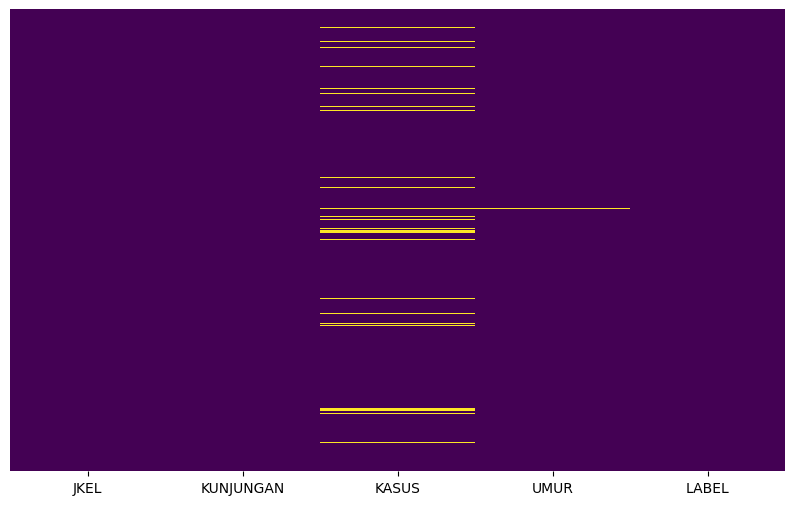

In [12]:
df_jantung.isnull().sum()

plt.figure(figsize=(10,6))
sns.heatmap(df_jantung.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [13]:
df_jantung = df_jantung.dropna(subset=['UMUR', 'KASUS'])

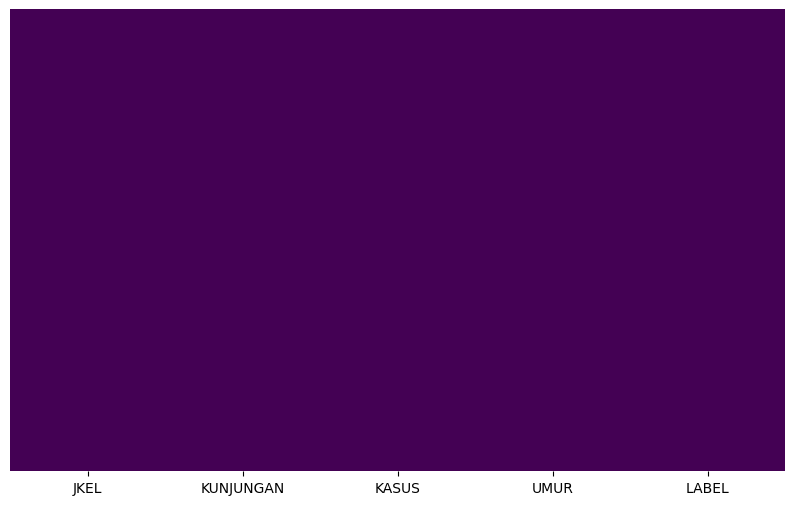

In [14]:
df_jantung.isnull().sum()

plt.figure(figsize=(10,6))
sns.heatmap(df_jantung.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

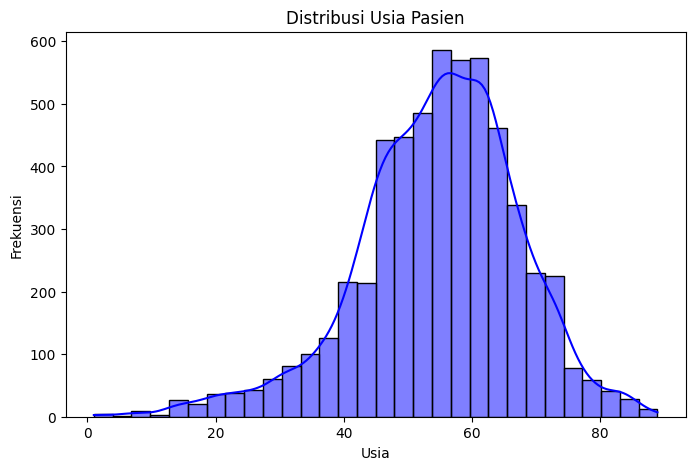

In [16]:
# Distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df_jantung['UMUR'], bins=30, color="blue", kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

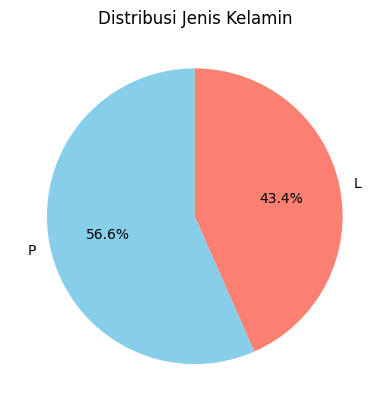

In [18]:
df_jantung["JKEL"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Distribusi Jenis Kelamin")
plt.ylabel("") 
plt.show()

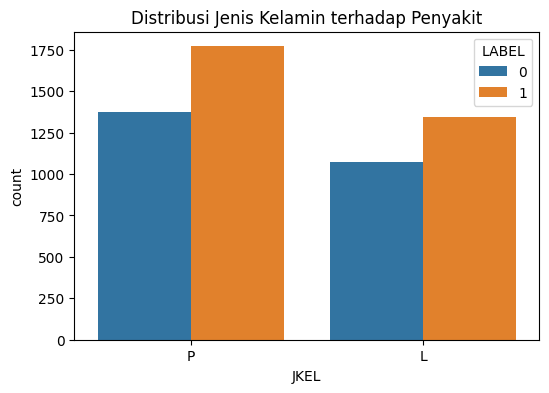

In [20]:
# Perbandingan jenis kelamin terhadap label penyakit
plt.figure(figsize=(6, 4))
sns.countplot(x='JKEL', hue='LABEL', data=df_jantung)
plt.title('Distribusi Jenis Kelamin terhadap Penyakit')
plt.show()

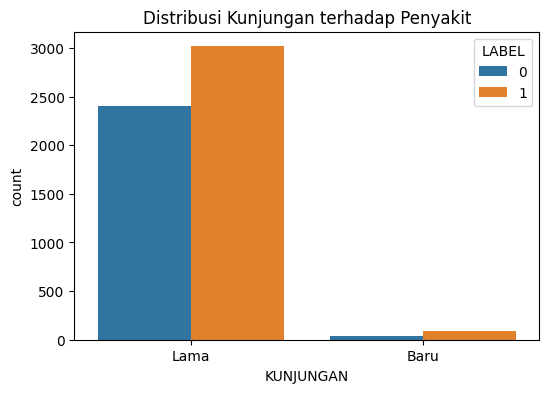

In [22]:
# Perbandingan kunjungan terhadap label penyakit
plt.figure(figsize=(6, 4))
sns.countplot(x='KUNJUNGAN', hue='LABEL', data=df_jantung)
plt.title('Distribusi Kunjungan terhadap Penyakit')
plt.show()

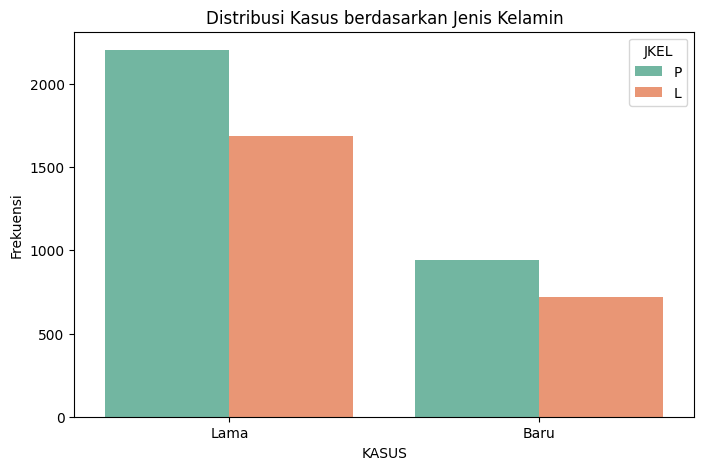

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_jantung, x="KASUS", hue="JKEL", palette="Set2")
plt.title("Distribusi Kasus berdasarkan Jenis Kelamin")
plt.ylabel("Frekuensi")
plt.show()

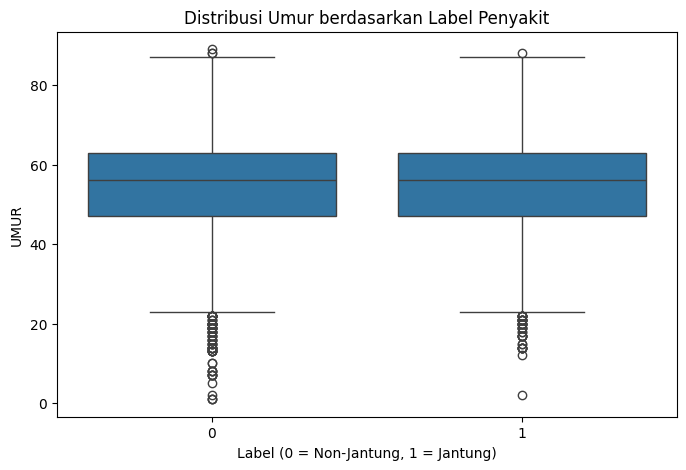

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='LABEL', y='UMUR', data=df_jantung)
plt.title('Distribusi Umur berdasarkan Label Penyakit')
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.show()

LABEL
1    3111
0    2444
Name: count, dtype: int64
LABEL
1    56.0036
0    43.9964
Name: proportion, dtype: float64


C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_34592\2024822706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_jantung['LABEL'], palette="viridis")


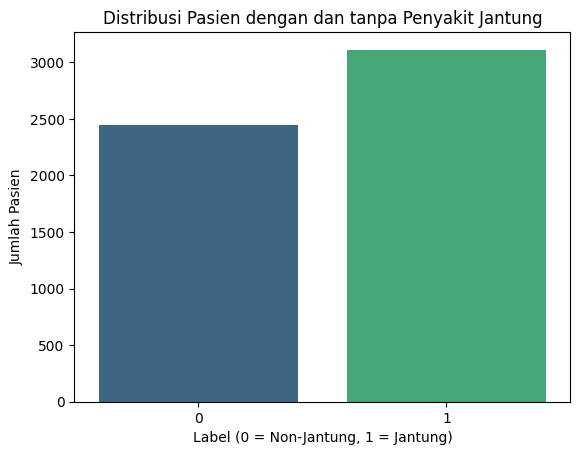

In [26]:
print(df_jantung['LABEL'].value_counts())
print(df_jantung['LABEL'].value_counts(normalize=True) * 100) 


sns.countplot(x=df_jantung['LABEL'], palette="viridis")
plt.title("Distribusi Pasien dengan dan tanpa Penyakit Jantung")
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.show()

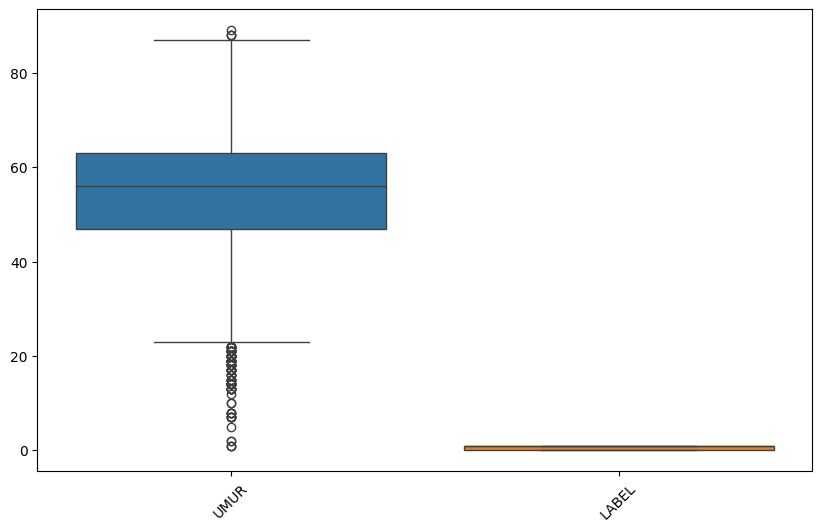

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_jantung)
plt.xticks(rotation=45)
plt.show()

Jumlah data sebelum menghapus outlier: 5555
Jumlah data setelah menghapus outlier: 5432


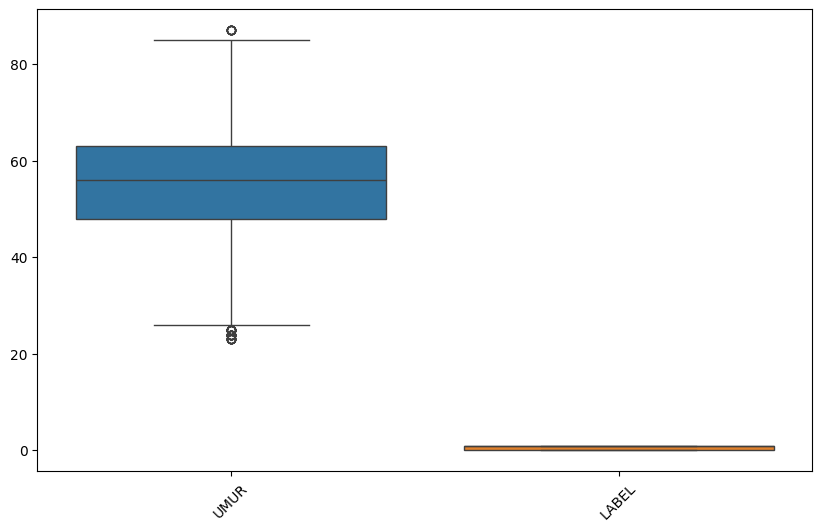

In [30]:
# Hitung Q1, Q3, dan IQR untuk kolom umur
Q1 = df_jantung['UMUR'].quantile(0.25)
Q3 = df_jantung['UMUR'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk mendeteksi outlier
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi baris yang bukan outlier pada kolom umur
df_no_outliers = df_jantung[(df_jantung['UMUR'] >= batas_bawah) & (df_jantung['UMUR'] <= batas_atas)]

# Tampilkan jumlah data sebelum & sesudah penghapusan outlier
print(f"Jumlah data sebelum menghapus outlier: {df_jantung.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_no_outliers.shape[0]}")

# Visualisasi boxplot setelah penghapusan outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45)
plt.show()

LABEL
1    3068
0    2364
Name: count, dtype: int64
LABEL
1    56.480118
0    43.519882
Name: proportion, dtype: float64


C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_34592\3474152290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_jantung['LABEL'], palette="viridis")


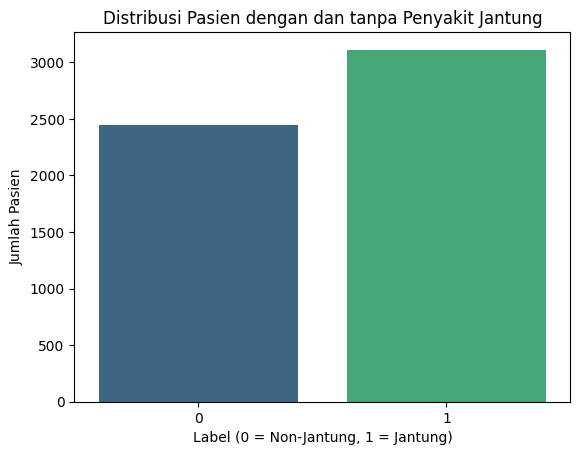

In [38]:
print(df_no_outliers['LABEL'].value_counts())
print(df_no_outliers['LABEL'].value_counts(normalize=True) * 100) 


sns.countplot(x=df_jantung['LABEL'], palette="viridis")
plt.title("Distribusi Pasien dengan dan tanpa Penyakit Jantung")
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.show()

In [39]:
# Pisahkan fitur (X) dan target (y)
X = df_no_outliers.drop(columns=['LABEL'])  
y = df_no_outliers['LABEL']  

# Bagi data menjadi 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Cek hasil pembagian
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 4345
Jumlah data test: 1087


Transformation

In [40]:
# Buat objek LabelEncoder
le = LabelEncoder()

# Daftar kolom kategorikal yang perlu di-encode
categorical_cols = ['JKEL', 'KUNJUNGAN', 'KASUS']

# Encoding hanya berdasarkan data train
for col in categorical_cols:
    le.fit(X_train[col])  # Latih LabelEncoder pada data train
    X_train[col] = le.transform(X_train[col])  # Transformasi data train
    X_test[col] = le.transform(X_test[col])  # Transformasi data test agar konsisten

# Cek hasil encoding
print(X_train.head())
print(X_test.head())

      JKEL  KUNJUNGAN  KASUS  UMUR
2242     1          1      1  64.0
3247     1          1      1  70.0
3598     1          1      1  48.0
498      0          1      0  61.0
5582     1          1      0  54.0
      JKEL  KUNJUNGAN  KASUS  UMUR
1849     0          1      1  46.0
1946     0          1      1  63.0
4712     0          1      1  62.0
868      0          1      0  27.0
1384     0          1      1  45.0


In [43]:
X_train.describe()

,JKEL,KUNJUNGAN,KASUS,UMUR
count,4345.000000,4345.000000,4345.000000,4345.000000
mean,0.566398,0.975144,0.704488,55.541542
std,0.495629,0.155705,0.456325,11.395158
min,0.000000,0.000000,0.000000,23.000000
25%,0.000000,1.000000,0.000000,48.000000
50%,1.000000,1.000000,1.000000,56.000000
75%,1.000000,1.000000,1.000000,63.000000
max,1.000000,1.000000,1.000000,87.000000


In [44]:
X_test.describe()

,JKEL,KUNJUNGAN,KASUS,UMUR
count,1087.000000,1087.000000,1087.000000,1087.000000
mean,0.564857,0.987121,0.688132,55.565777
std,0.496004,0.112807,0.463469,11.536596
min,0.000000,0.000000,0.000000,23.000000
25%,0.000000,1.000000,0.000000,48.000000
50%,1.000000,1.000000,1.000000,56.000000
75%,1.000000,1.000000,1.000000,63.000000
max,1.000000,1.000000,1.000000,87.000000


Text(0.5, 1.0, 'Korelasi Antar Fitur')

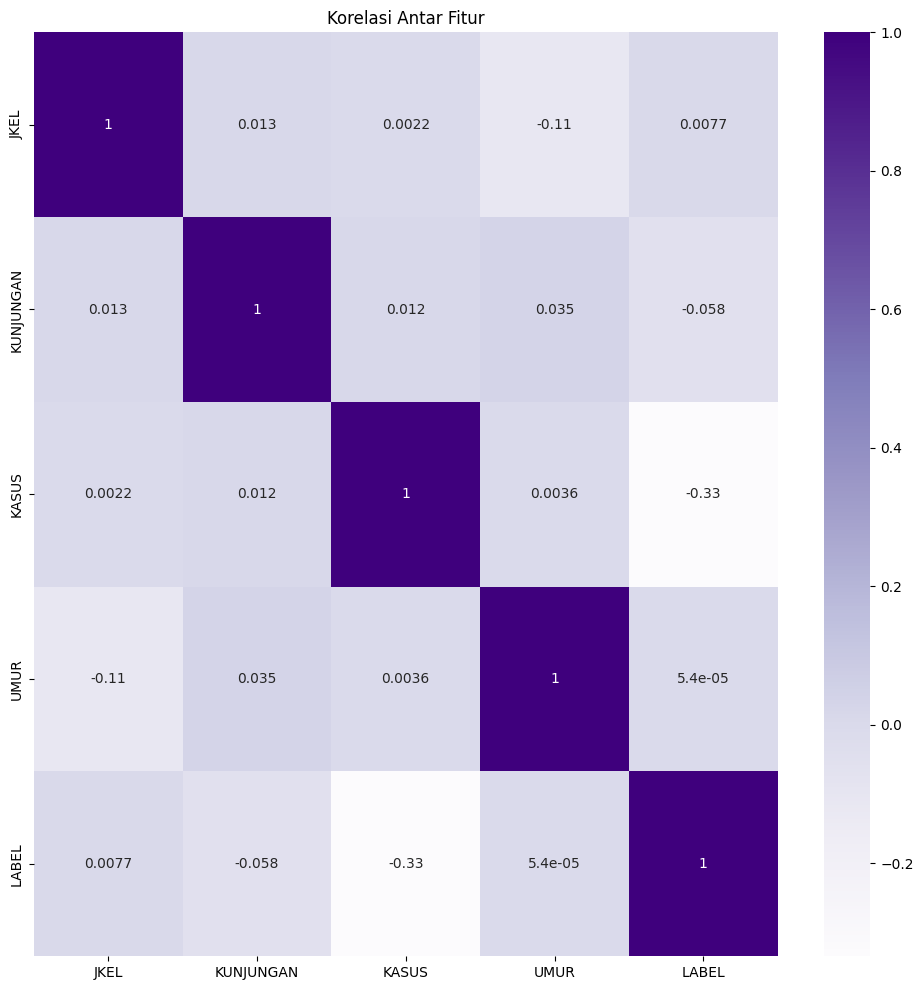

In [45]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat=df_no_outliers.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True, cmap='Purples')
plt.title('Korelasi Antar Fitur')

In [46]:
scaler = StandardScaler()

features_to_scale = ['UMUR']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

Distribusi Label di Train Set: Counter({1: 2454, 0: 1891})


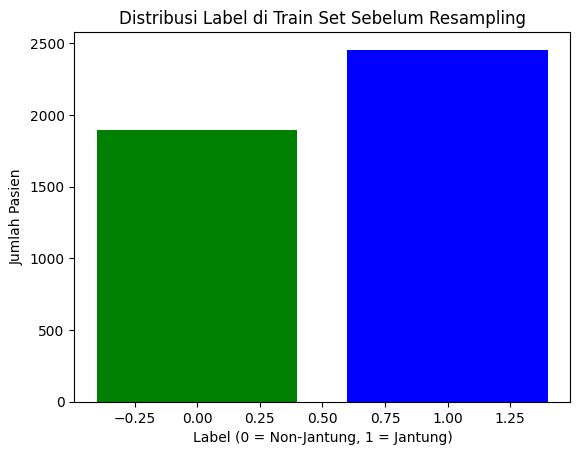

In [47]:
# Cek distribusi kelas pada train set
counter = Counter(y_train)  
print("Distribusi Label di Train Set:", counter)

# Visualisasi distribusi kelas
plt.bar(counter.keys(), counter.values(), color=['blue', 'green'])
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.title("Distribusi Label di Train Set Sebelum Resampling")
plt.show()

Distribusi Label Setelah SMOTE: Counter({1: 2454, 0: 2454})


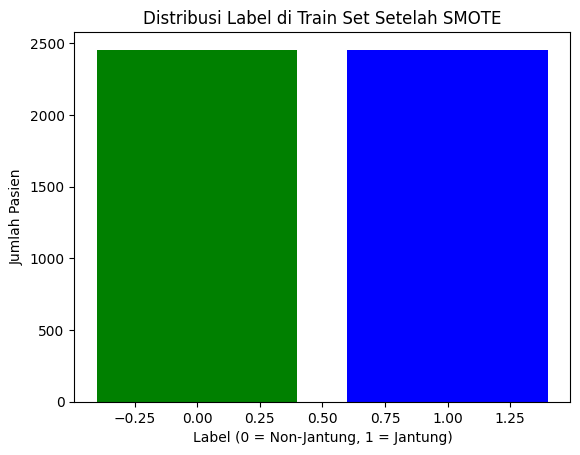

In [48]:
# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Terapkan SMOTE hanya pada train set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
counter_resampled = Counter(y_train_resampled)
print("Distribusi Label Setelah SMOTE:", counter_resampled)

# Visualisasi distribusi setelah SMOTE
plt.bar(counter_resampled.keys(), counter_resampled.values(), color=['blue', 'green'])
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.title("Distribusi Label di Train Set Setelah SMOTE")
plt.show()

In [49]:
# Pisahkan Kembali Fitur & Label Setelah SMOTE 
X_train_final = X_train_resampled
y_train_final = y_train_resampled            

# Cek Data Setelah Resampling
print("Jumlah data train setelah SMOTE:", X_train_final.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train setelah SMOTE: 4908
Jumlah data test: 1087


Data Mining

RFC 

In [51]:
rf_non = RandomForestClassifier(random_state=42)
rf_non.fit(X_train, y_train)

y_pred_rf_non = rf_non.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf_non))

# Menampilkan metrik tambahan di bawah classification report
print("\nRandom Forest Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_rf_non)))
print("Random Forest Precision : {:.16f}".format(precision_score(y_test, y_pred_rf_non, average='weighted')))
print("Random Forest Recall    : {:.16f}".format(recall_score(y_test, y_pred_rf_non, average='weighted')))
print("Random Forest F1-Score  : {:.16f}".format(f1_score(y_test, y_pred_rf_non, average='weighted')))

# Pastikan model sudah dilatih
rf_non.fit(X_train, y_train)

# Prediksi label untuk train dan test
y_train_pred_rf = rf_non.predict(X_train)
y_test_pred_rf = rf_non.predict(X_test)

# Hitung recall untuk train dan test
recall_train_rf = recall_score(y_train, y_train_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)

# Tampilkan hasil
print(f"Recall Train: {recall_train_rf:.6f}")
print(f"Recall Test: {recall_test_rf:.6f}")

Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       473
           1       0.68      0.59      0.63       614

    accuracy                           0.61      1087
   macro avg       0.61      0.62      0.61      1087
weighted avg       0.62      0.61      0.62      1087


Random Forest Accuracy  : 0.6136154553817847
Random Forest Precision : 0.6234574061511332
Random Forest Recall    : 0.6136154553817847
Random Forest F1-Score  : 0.6152163041990658
Recall Train: 0.644662
Recall Test: 0.592834


SVM

In [52]:
from sklearn.svm import SVC
svm_non = SVC(probability=True, random_state=42)
svm_non.fit(X_train, y_train)

y_pred_svm_non = svm_non.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm_non))

# Menampilkan metrik tambahan di bawah classification report
print("SVM Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_svm_non)))
print("SVM Precision : {:.16f}".format(precision_score(y_test, y_pred_svm_non, average='weighted')))
print("SVM Recall    : {:.16f}".format(recall_score(y_test, y_pred_svm_non, average='weighted')))
print("SVM F1-Score  : {:.16f}".format(f1_score(y_test, y_pred_svm_non, average='weighted')))

# Pastikan model sudah dilatih
svm_non.fit(X_train, y_train)

# Prediksi label untuk train dan test
y_train_pred_svm = svm_non.predict(X_train)
y_test_pred_svm = svm_non.predict(X_test)

# Hitung recall untuk train dan test
recall_train_svm = recall_score(y_train, y_train_pred_svm)
recall_test_svm = recall_score(y_test, y_test_pred_svm)

# Tampilkan hasil
print(f"Recall Train: {recall_train_svm:.6f}")
print(f"Recall Test: {recall_test_svm:.6f}")

SVM:
               precision    recall  f1-score   support

           0       0.55      0.86      0.67       473
           1       0.82      0.46      0.59       614

    accuracy                           0.64      1087
   macro avg       0.68      0.66      0.63      1087
weighted avg       0.70      0.64      0.63      1087

SVM Accuracy  : 0.6375344986200552
SVM Precision : 0.7018055177502044
SVM Recall    : 0.6375344986200552
SVM F1-Score  : 0.6271978290022322
Recall Train: 0.448655
Recall Test: 0.462541


RFC Resampling

In [53]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train_final)

y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Menampilkan metrik tambahan di bawah classification report
print("\nRandom Forest Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_rf)))
print("Random Forest Precision : {:.16f}".format(precision_score(y_test, y_pred_rf, average='weighted')))
print("Random Forest Recall    : {:.16f}".format(recall_score(y_test, y_pred_rf, average='weighted')))
print("Random Forest F1-Score  : {:.16f}".format(f1_score(y_test, y_pred_rf, average='weighted')))

# Pastikan model sudah dilatih
rf.fit(X_train_final, y_train_final)

# Prediksi label untuk train dan test
y_train_pred_rfspl = rf.predict(X_train_final)
y_test_pred_rfspl = rf.predict(X_test)

# Hitung recall untuk train dan test
recall_train_rfspl = recall_score(y_train_final, y_train_pred_rfspl)
recall_test_rfspl = recall_score(y_test, y_test_pred_rfspl)

# Tampilkan hasil
print(f"Recall Train: {recall_train_rfspl:.6f}")
print(f"Recall Test: {recall_test_rfspl:.6f}")

Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63       473
           1       0.73      0.54      0.62       614

    accuracy                           0.63      1087
   macro avg       0.64      0.64      0.63      1087
weighted avg       0.65      0.63      0.63      1087


Random Forest Accuracy  : 0.6274149034038639
Random Forest Precision : 0.6531405565310284
Random Forest Recall    : 0.6274149034038639
Random Forest F1-Score  : 0.6265121791201986
Recall Train: 0.552975
Recall Test: 0.540717


SVM Resampling

In [54]:
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_final, y_train_final)

y_pred_svm = svm.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm))

# Menampilkan metrik tambahan di bawah classification report
print("SVM Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_svm)))
print("SVM Precision : {:.16f}".format(precision_score(y_test, y_pred_svm, average='weighted')))
print("SVM Recall    : {:.16f}".format(recall_score(y_test, y_pred_svm, average='weighted')))
print("SVM F1-Score  : {:.16f}".format(f1_score(y_test, y_pred_svm, average='weighted')))

# Pastikan model sudah dilatih
svm.fit(X_train_final, y_train_final)

# Prediksi label untuk train dan test
y_train_pred_svmspl = svm.predict(X_train_final)
y_test_pred_svmspl = svm.predict(X_test)

# Hitung recall untuk train dan test
recall_train_svmspl = recall_score(y_train_final, y_train_pred_svmspl)
recall_test_svmspl = recall_score(y_test, y_test_pred_svmspl)

# Tampilkan hasil
print(f"Recall Train: {recall_train_svmspl:.6f}")
print(f"Recall Test: {recall_test_svmspl:.6f}")

SVM:
               precision    recall  f1-score   support

           0       0.55      0.86      0.67       473
           1       0.82      0.46      0.59       614

    accuracy                           0.64      1087
   macro avg       0.68      0.66      0.63      1087
weighted avg       0.70      0.64      0.63      1087

SVM Accuracy  : 0.6375344986200552
SVM Precision : 0.7018055177502044
SVM Recall    : 0.6375344986200552
SVM F1-Score  : 0.6271978290022322
Recall Train: 0.448248
Recall Test: 0.462541


Evaluation

Hyperparameter Tuning RFC

In [60]:
# Definisi model RF
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter yang akan dicari
rf_params = {
    "n_estimators": [50, 100, 200, 300, 500],  # Jumlah pohon dalam hutan
    "max_depth": [None, 10, 20, 30],      # Kedalaman maksimum pohon
    "min_samples_split": [2, 5, 10],      # Jumlah minimal sampel untuk split
    "min_samples_leaf": [1, 2, 4],        # Jumlah minimal sampel pada daun
    "bootstrap": [True, False]            # Bootstrap sampling
}

# Randomized Search CV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, scoring="accuracy", random_state=42, n_jobs=-1)
rf_random.fit(X_train_final, y_train_final)

# Menampilkan hasil terbaik
print("Best RF Parameters:", rf_random.best_params_)
print("Best RF Accuracy:", rf_random.best_score_)

Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best RF Accuracy: 0.6477219928125214


Hyperparameter Tuning SVM

In [62]:
svm_params = {
    "C": [1, 10],  # Mengurangi jumlah nilai C agar lebih cepat
    "kernel": ["rbf"],  # Hanya gunakan RBF kernel (paling umum untuk SVM)
    "gamma": ["scale"]  # Gunakan "scale" yang otomatis menyesuaikan dengan data
}

svm_halving = HalvingGridSearchCV(SVC(probability=True, random_state=42),
                                  param_grid=svm_params,
                                  factor=2,  # Setengah kandidat dieliminasi tiap iterasi
                                  cv=3, 
                                  scoring="accuracy", 
                                  n_jobs=-1)

svm_halving.fit(X_train_final, y_train_final)

print("Best SVM Parameters:", svm_halving.best_params_)
print("Best SVM Accuracy:", svm_halving.best_score_)

Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.6574979625101874


RFC Tuning

In [61]:
rf_tun_no_spl = RandomForestClassifier(n_estimators= 200, 
                                       min_samples_split= 10, 
                                       min_samples_leaf= 1, 
                                       max_depth=10, 
                                       bootstrap= True, 
                                       random_state=42)
rf_tun_no_spl.fit(X_train, y_train)

y_pred_rftun_nospl = rf_tun_no_spl.predict(X_test)

print("Random Forest: \n", classification_report(y_test, y_pred_rftun_nospl))

# Menampilkan metrik tambahan di bawah classification report
print("\nRandom Forest Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_rftun_nospl)))
print("Random Forest Precision : {:.16f}".format(precision_score(y_test, y_pred_rftun_nospl, average='weighted')))
print("Random Forest Recall    : {:.16f}".format(recall_score(y_test, y_pred_rftun_nospl, average='weighted')))
print("Random Forest F1-Score  : {:.16f}".format(f1_score(y_test,y_pred_rftun_nospl, average='weighted')))

# Pastikan model sudah dilatih
rf_tun_no_spl.fit(X_train, y_train)

# Prediksi label untuk train dan test
y_train_pred_rftun = rf_tun_no_spl.predict(X_train)
y_test_pred_rftun = rf_tun_no_spl.predict(X_test)

# Hitung recall untuk train dan test
recall_train_rftun = recall_score(y_train, y_train_pred_rftun)
recall_test_rftun = recall_score(y_test, y_test_pred_rftun)

# Tampilkan hasil
print(f"Recall Train: {recall_train_rftun:.6f}")
print(f"Recall Test: {recall_test_rftun:.6f}")

Random Forest: 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       473
           1       0.69      0.61      0.64       614

    accuracy                           0.62      1087
   macro avg       0.62      0.62      0.62      1087
weighted avg       0.63      0.62      0.62      1087


Random Forest Accuracy  : 0.6218951241950322
Random Forest Precision : 0.6303824132106756
Random Forest Recall    : 0.6218951241950322
Random Forest F1-Score  : 0.6234921589029667
Recall Train: 0.629584
Recall Test: 0.607492


SVM Tuning

In [57]:
svm_tun_no_spl = SVC(C=1, 
                     gamma='scale', 
                     kernel='rbf', 
                     probability=True, 
                     random_state=42)
svm_tun_no_spl.fit(X_train, y_train)

y_pred_svmtun_nospl = svm_tun_no_spl.predict(X_test)

print("SVM: \n", classification_report(y_test, y_pred_svmtun_nospl))

# Menampilkan metrik tambahan di bawah classification report
print("\nSVM Forest Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_svmtun_nospl)))
print("SVM Forest Precision : {:.16f}".format(precision_score(y_test, y_pred_svmtun_nospl, average='weighted')))
print("SVM Forest Recall    : {:.16f}".format(recall_score(y_test, y_pred_svmtun_nospl, average='weighted')))
print("SVM Forest F1-Score  : {:.16f}".format(f1_score(y_test,y_pred_svmtun_nospl, average='weighted')))

# Pastikan model sudah dilatih
svm_tun_no_spl.fit(X_train, y_train)

# Prediksi label untuk train dan test
y_train_pred_svmtun = svm_tun_no_spl.predict(X_train)
y_test_pred_svmtun = svm_tun_no_spl.predict(X_test)

# Hitung recall untuk train dan test
recall_train_svmtun = recall_score(y_train, y_train_pred_svmtun)
recall_test_svmtun = recall_score(y_test, y_test_pred_svmtun)

# Tampilkan hasil
print(f"Recall Train: {recall_train_svmtun:.6f}")
print(f"Recall Test: {recall_test_svmtun:.6f}")

SVM: 
               precision    recall  f1-score   support

           0       0.55      0.86      0.67       473
           1       0.82      0.46      0.59       614

    accuracy                           0.64      1087
   macro avg       0.68      0.66      0.63      1087
weighted avg       0.70      0.64      0.63      1087


SVM Forest Accuracy  : 0.6375344986200552
SVM Forest Precision : 0.7018055177502044
SVM Forest Recall    : 0.6375344986200552
SVM Forest F1-Score  : 0.6271978290022322
Recall Train: 0.448655
Recall Test: 0.462541


RFC Resampling Tuning

In [63]:
rf_tun = RandomForestClassifier(n_estimators= 200, 
                                min_samples_split= 10, 
                                min_samples_leaf= 1, 
                                max_depth=10, 
                                bootstrap= True, 
                                random_state=42)
rf_tun.fit(X_train_final, y_train_final)

y_pred_rf_tunspl = rf_tun.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf_tunspl))

# Menampilkan metrik tambahan di bawah classification report
print("\nRandom Forest Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_rf_tunspl)))
print("Random Forest Precision : {:.16f}".format(precision_score(y_test, y_pred_rf_tunspl, average='weighted')))
print("Random Forest Recall    : {:.16f}".format(recall_score(y_test, y_pred_rf_tunspl, average='weighted')))
print("Random Forest F1-Score  : {:.16f}".format(f1_score(y_test,y_pred_rf_tunspl, average='weighted')))

# Pastikan model sudah dilatih
rf_tun.fit(X_train_final, y_train_final)

# Prediksi label untuk train dan test
y_train_pred_rftun = rf_tun.predict(X_train_final)
y_test_pred_rftun = rf_tun.predict(X_test)

# Hitung recall untuk train dan test
recall_train_rftun = recall_score(y_train_final, y_train_pred_rftun)
recall_test_rftun = recall_score(y_test, y_test_pred_rftun)

# Tampilkan hasil
print(f"Recall Train: {recall_train_rftun:.6f}")
print(f"Recall Test: {recall_test_rftun:.6f}")

Random Forest:
               precision    recall  f1-score   support

           0       0.54      0.77      0.64       473
           1       0.74      0.50      0.60       614

    accuracy                           0.62      1087
   macro avg       0.64      0.64      0.62      1087
weighted avg       0.65      0.62      0.61      1087


Random Forest Accuracy  : 0.6182152713891444
Random Forest Precision : 0.6536146545834361
Random Forest Recall    : 0.6182152713891444
Random Forest F1-Score  : 0.6146411614261384
Recall Train: 0.497963
Recall Test: 0.501629


SVM Resampling Tuning

In [59]:
svm_tun = SVC(C= 1, 
              gamma= 'scale', 
              kernel= 'rbf', 
              probability=True, 
              random_state=42)
svm_tun.fit(X_train_final, y_train_final)

y_pred_svm_tunspl = svm_tun.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm_tunspl))

# Menampilkan metrik tambahan di bawah classification report
print("\nSVM Accuracy  : {:.16f}".format(accuracy_score(y_test, y_pred_svm_tunspl)))
print("SVM Precision : {:.16f}".format(precision_score(y_test, y_pred_svm_tunspl, average='weighted')))
print("SVM Recall    : {:.16f}".format(recall_score(y_test, y_pred_svm_tunspl, average='weighted')))
print("SVM F1-Score  : {:.16f}".format(f1_score(y_test,y_pred_svm_tunspl, average='weighted')))

# Pastikan model sudah dilatih
svm_tun.fit(X_train_final, y_train_final)

# Prediksi label untuk train dan test
y_train_pred_svmtun = svm_tun.predict(X_train_final)
y_test_pred_svmtun = svm_tun.predict(X_test)

# Hitung recall untuk train dan test
recall_train_svmtun = recall_score(y_train_final, y_train_pred_svmtun)
recall_test_svmtun = recall_score(y_test, y_test_pred_svmtun)

# Tampilkan hasil
print(f"Recall Train: {recall_train_svmtun:.6f}")
print(f"Recall Test: {recall_test_svmtun:.6f}")

SVM:
               precision    recall  f1-score   support

           0       0.55      0.86      0.67       473
           1       0.82      0.46      0.59       614

    accuracy                           0.64      1087
   macro avg       0.68      0.66      0.63      1087
weighted avg       0.70      0.64      0.63      1087


SVM Accuracy  : 0.6375344986200552
SVM Precision : 0.7018055177502044
SVM Recall    : 0.6375344986200552
SVM F1-Score  : 0.6271978290022322
Recall Train: 0.448248
Recall Test: 0.462541


Confusion Matrix RFC SVM Final

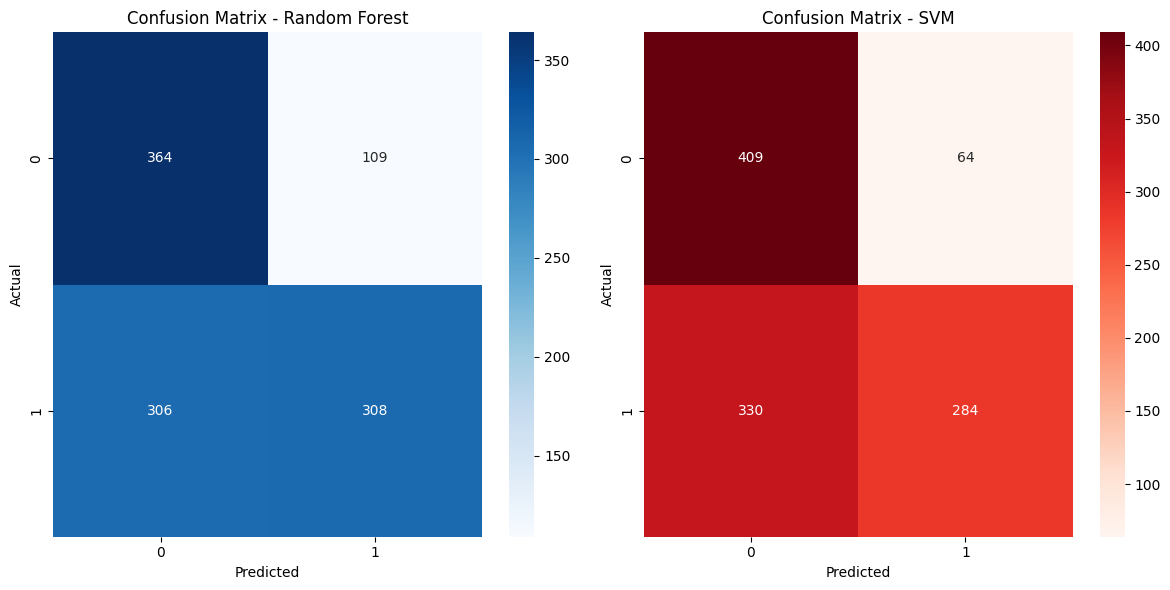

In [77]:
rf_conf = RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 1, max_depth=10, bootstrap= True, random_state=42)
svm_conf = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)

rf_conf.fit(X_train_final, y_train_final)
svm_conf.fit(X_train_final, y_train_final)

y_pred_rfconf = rf_conf.predict(X_test)
y_pred_svmconf = svm_conf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rfconf)
cm_svm = confusion_matrix(y_test, y_pred_svmconf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Cross Validation RFC

In [64]:
rf_model_cv = RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 1, max_depth=10, bootstrap= True, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi cross-validation
cv_scores = cross_val_score(rf_model_cv, X_train_final, y_train_final, cv=skf, scoring='accuracy')

# Cetak hasil dengan format yang rapi
print(f"Maximum cross-validation RFC : {np.max(cv_scores)}")
print(f"Minimum cross-validation RFC : {np.min(cv_scores)}")
print(f"Overall cross-validation RFC : {np.mean(cv_scores)}")
print(f"Standar Deviation: {np.std(cv_scores)}")

Maximum cross-validation RFC : 0.6687054026503568
Minimum cross-validation RFC : 0.6211812627291242
Overall cross-validation RFC : 0.6479264892426573
Standar Deviation: 0.01769593626305131


Cross Validation SVM

In [65]:
# Evaluasi cross-validation
svm_model_cv = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model_cv, X_train_final, y_train_final, cv=skf, scoring='accuracy')

# Cetak hasil dengan format yang rapi
print(f"Maximum cross-validation SVM : {np.max(cv_scores)}")
print(f"Minimum cross-validation SVM : {np.min(cv_scores)}")
print(f"Overall cross-validation SVM : {np.mean(cv_scores)}")
print(f"Standar Deviation: {np.std(cv_scores)}")

Maximum cross-validation SVM : 0.6792260692464358
Minimum cross-validation SVM : 0.6323828920570265
Overall cross-validation SVM : 0.6575027352695096
Standar Deviation: 0.01963949185486596


ROC AUC RFC

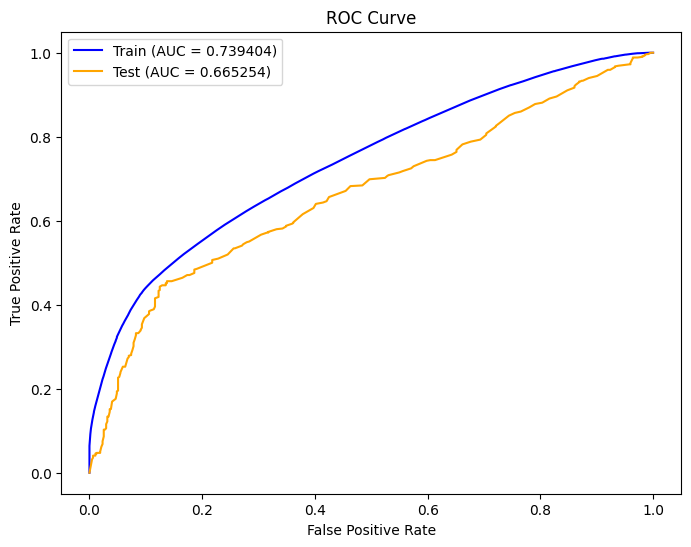

ROC AUC Train: 0.739404
ROC AUC Test: 0.665254


In [66]:
from sklearn.metrics import roc_curve, auc

rf_model_notunspl = RandomForestClassifier(random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
rf_model_notunspl.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_notunspl = rf_model_notunspl.predict_proba(X_train)[:, 1]  # Probabilitas kelas positif
y_test_probs_notunspl = rf_model_notunspl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train1, tpr_train1, _ = roc_curve(y_train, y_train_probs_notunspl)
fpr_test1, tpr_test1, _ = roc_curve(y_test, y_test_probs_notunspl)

# Hitung nilai ROC AUC
roc_auc_train_notunspl = auc(fpr_train1, tpr_train1)
roc_auc_test_notunspl = auc(fpr_test1, tpr_test1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train1, tpr_train1, label=f"Train (AUC = {roc_auc_train_notunspl:.6f})", color="blue")
plt.plot(fpr_test1, tpr_test1, label=f"Test (AUC = {roc_auc_test_notunspl:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_notunspl:.6f}")
print(f"ROC AUC Test: {roc_auc_test_notunspl:.6f}")

ROC AUC SVM 

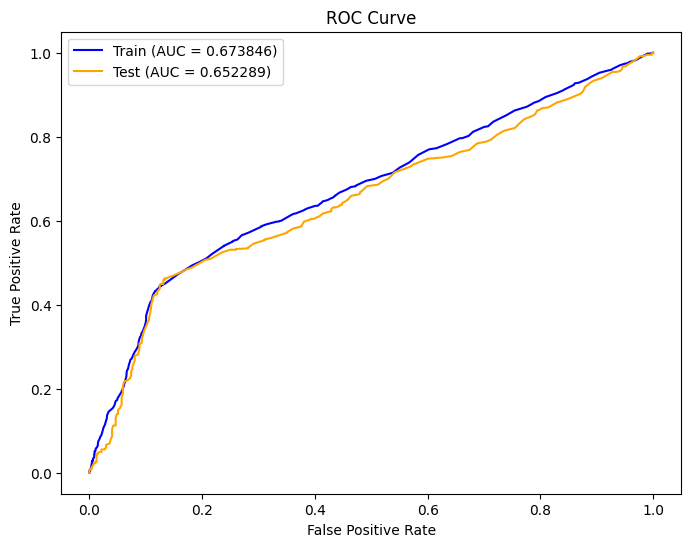

ROC AUC Train: 0.673846
ROC AUC Test: 0.652289


In [67]:
from sklearn.metrics import roc_curve, auc

svm_model_notunspl = SVC(probability=True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
svm_model_notunspl.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_notunspl_svm = svm_model_notunspl.predict_proba(X_train)[:, 1]  # Probabilitas kelas positif
y_test_probs_notunspl_svm = svm_model_notunspl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train11, tpr_train11, _ = roc_curve(y_train, y_train_probs_notunspl_svm)
fpr_test11, tpr_test11, _ = roc_curve(y_test, y_test_probs_notunspl_svm)

# Hitung nilai ROC AUC
roc_auc_train_notunspl_svm = auc(fpr_train11, tpr_train11)
roc_auc_test_notunspl_svm = auc(fpr_test11, tpr_test11)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train11, tpr_train11, label=f"Train (AUC = {roc_auc_train_notunspl_svm:.6f})", color="blue")
plt.plot(fpr_test11, tpr_test11, label=f"Test (AUC = {roc_auc_test_notunspl_svm:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_notunspl_svm:.6f}")
print(f"ROC AUC Test: {roc_auc_test_notunspl_svm:.6f}")

ROC AUC RFC Resampling

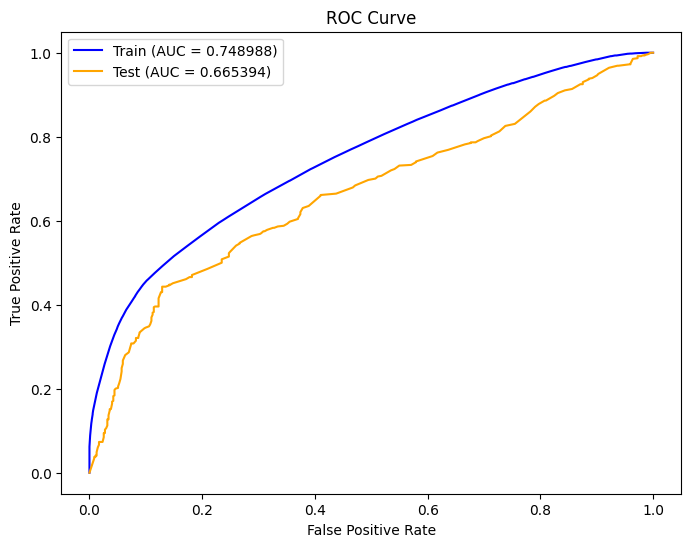

ROC AUC Train: 0.748988
ROC AUC Test: 0.665394


In [68]:
from sklearn.metrics import roc_curve, auc

rf_model_notun = RandomForestClassifier(random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
rf_model_notun.fit(X_train_final, y_train_final)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_notun = rf_model_notun.predict_proba(X_train_final)[:, 1]  # Probabilitas kelas positif
y_test_probs_notun = rf_model_notun.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train2, tpr_train2, _ = roc_curve(y_train_final, y_train_probs_notun)
fpr_test2, tpr_test2, _ = roc_curve(y_test, y_test_probs_notun)

# Hitung nilai ROC AUC
roc_auc_train_notun = auc(fpr_train2, tpr_train2)
roc_auc_test_notun = auc(fpr_test2, tpr_test2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train2, tpr_train2, label=f"Train (AUC = {roc_auc_train_notun:.6f})", color="blue")
plt.plot(fpr_test2, tpr_test2, label=f"Test (AUC = {roc_auc_test_notun:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_notun:.6f}")
print(f"ROC AUC Test: {roc_auc_test_notun:.6f}")

ROC AUC SVM Resampling

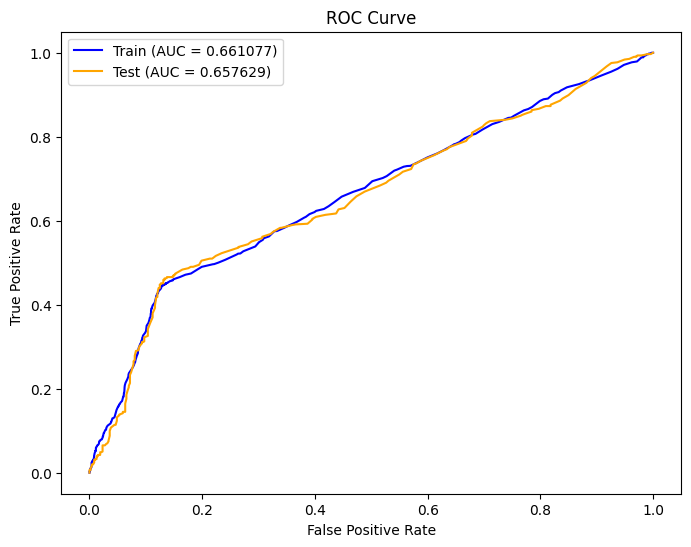

ROC AUC Train: 0.661077
ROC AUC Test: 0.657629


In [69]:
from sklearn.metrics import roc_curve, auc

svm_model_notun = SVC(probability=True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
svm_model_notun.fit(X_train_final, y_train_final)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_notun_svm = svm_model_notun.predict_proba(X_train_final)[:, 1]  # Probabilitas kelas positif
y_test_probs_notun_svm = svm_model_notun.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train22, tpr_train22, _ = roc_curve(y_train_final, y_train_probs_notun_svm)
fpr_test22, tpr_test22, _ = roc_curve(y_test, y_test_probs_notun_svm)

# Hitung nilai ROC AUC
roc_auc_train_notun_svm = auc(fpr_train22, tpr_train22)
roc_auc_test_notun_svm = auc(fpr_test22, tpr_test22)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train22, tpr_train22, label=f"Train (AUC = {roc_auc_train_notun_svm:.6f})", color="blue")
plt.plot(fpr_test22, tpr_test22, label=f"Test (AUC = {roc_auc_test_notun_svm:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_notun_svm:.6f}")
print(f"ROC AUC Test: {roc_auc_test_notun_svm:.6f}")

ROC AUC RFC Tuning

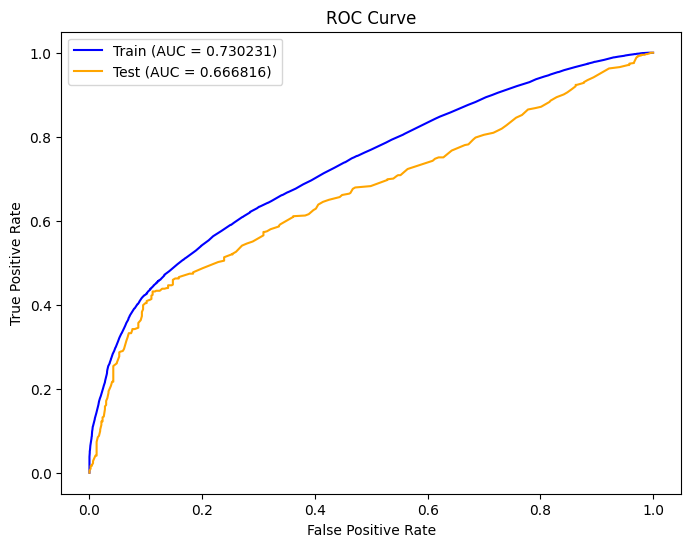

ROC AUC Train: 0.730231
ROC AUC Test: 0.666816


In [70]:
from sklearn.metrics import roc_curve, auc

rf_model_nospl = RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 1, max_depth=10, bootstrap= True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
rf_model_nospl.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_nospl = rf_model_nospl.predict_proba(X_train)[:, 1]  # Probabilitas kelas positif
y_test_probs_nospl = rf_model_nospl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train3, tpr_train3, _ = roc_curve(y_train, y_train_probs_nospl)
fpr_test3, tpr_test3, _ = roc_curve(y_test, y_test_probs_nospl)

# Hitung nilai ROC AUC
roc_auc_train_nospl = auc(fpr_train3, tpr_train3)
roc_auc_test_nospl = auc(fpr_test3, tpr_test3)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train3, tpr_train3, label=f"Train (AUC = {roc_auc_train_nospl:.6f})", color="blue")
plt.plot(fpr_test3, tpr_test3, label=f"Test (AUC = {roc_auc_test_nospl:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_nospl:.6f}")
print(f"ROC AUC Test: {roc_auc_test_nospl:.6f}")


ROC AUC SVM Tuning

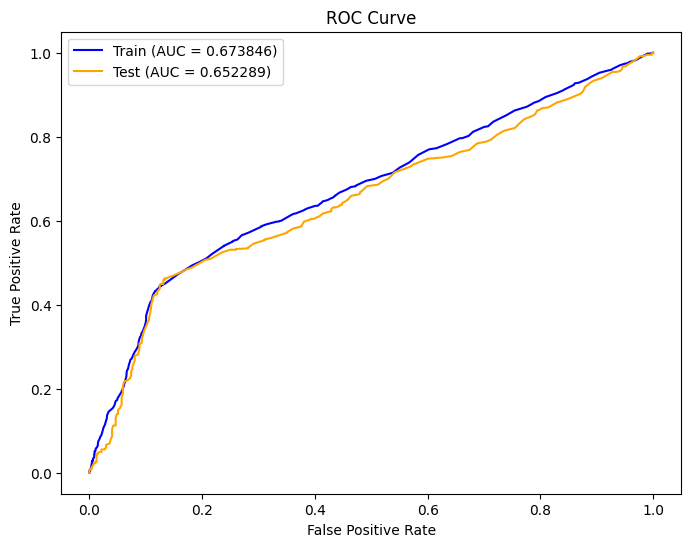

ROC AUC Train: 0.673846
ROC AUC Test: 0.652289


In [71]:
from sklearn.metrics import roc_curve, auc

svm_model_nospl = SVC(C= 1, gamma= 'scale', kernel= 'rbf', probability=True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
svm_model_nospl.fit(X_train, y_train)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_nospl_svm = svm_model_nospl.predict_proba(X_train)[:, 1]  # Probabilitas kelas positif
y_test_probs_nospl_svm = svm_model_nospl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train33, tpr_train33, _ = roc_curve(y_train, y_train_probs_nospl_svm)
fpr_test33, tpr_test33, _ = roc_curve(y_test, y_test_probs_nospl_svm)

# Hitung nilai ROC AUC
roc_auc_train_nospl_svm = auc(fpr_train33, tpr_train33)
roc_auc_test_nospl_svm = auc(fpr_test33, tpr_test33)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train33, tpr_train33, label=f"Train (AUC = {roc_auc_train_nospl_svm:.6f})", color="blue")
plt.plot(fpr_test33, tpr_test33, label=f"Test (AUC = {roc_auc_test_nospl_svm:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_nospl_svm:.6f}")
print(f"ROC AUC Test: {roc_auc_test_nospl_svm:.6f}")

ROC AUC RFC Resampling Tuning

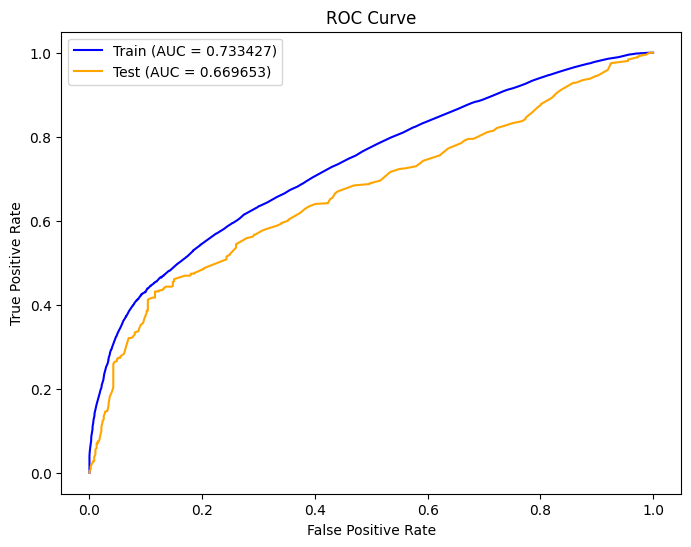

ROC AUC Train: 0.733427
ROC AUC Test: 0.669653


In [72]:
from sklearn.metrics import roc_curve, auc

rf_model_tunspl = RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 1, max_depth=10, bootstrap= True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
rf_model_tunspl.fit(X_train_final, y_train_final)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_tunspl = rf_model_tunspl.predict_proba(X_train_final)[:, 1]  # Probabilitas kelas positif
y_test_probs_tunspl = rf_model_tunspl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train4, tpr_train4, _ = roc_curve(y_train_final, y_train_probs_tunspl)
fpr_test4, tpr_test4, _ = roc_curve(y_test, y_test_probs_tunspl)

# Hitung nilai ROC AUC
roc_auc_train_tunspl = auc(fpr_train4, tpr_train4)
roc_auc_test_tunspl = auc(fpr_test4, tpr_test4)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train4, tpr_train4, label=f"Train (AUC = {roc_auc_train_tunspl:.6f})", color="blue")
plt.plot(fpr_test4, tpr_test4, label=f"Test (AUC = {roc_auc_test_tunspl:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_tunspl:.6f}")
print(f"ROC AUC Test: {roc_auc_test_tunspl:.6f}")

ROC AUC SVM Resampling Tuning

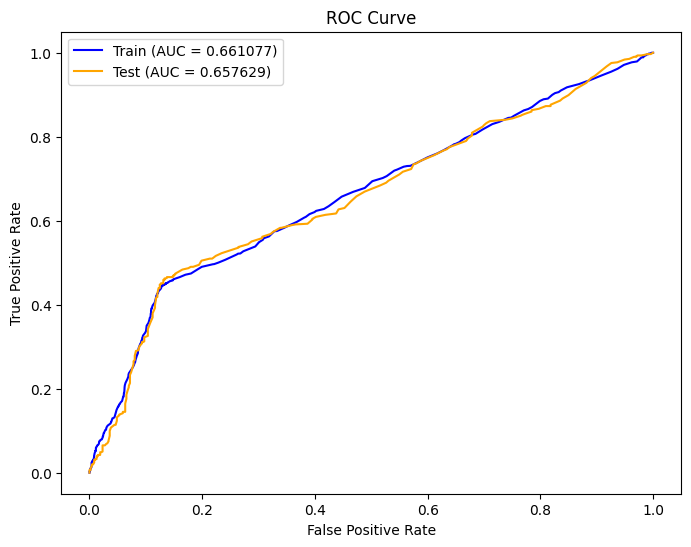

ROC AUC Train: 0.661077
ROC AUC Test: 0.657629


In [73]:
from sklearn.metrics import roc_curve, auc

svm_model_tunspl = SVC(C= 1, gamma= 'scale', kernel= 'rbf', probability=True, random_state=42)

# Pastikan model sudah dilatih sebelum digunakan
svm_model_tunspl.fit(X_train_final, y_train_final)

# Prediksi probabilitas untuk ROC Curve
y_train_probs_tunspl_svm = svm_model_tunspl.predict_proba(X_train_final)[:, 1]  # Probabilitas kelas positif
y_test_probs_tunspl_svm = svm_model_tunspl.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr_train44, tpr_train44, _ = roc_curve(y_train_final, y_train_probs_tunspl_svm)
fpr_test44, tpr_test44, _ = roc_curve(y_test, y_test_probs_tunspl_svm)

# Hitung nilai ROC AUC
roc_auc_train_tunspl_svm = auc(fpr_train44, tpr_train44)
roc_auc_test_tunspl_svm = auc(fpr_test44, tpr_test44)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train44, tpr_train44, label=f"Train (AUC = {roc_auc_train_tunspl_svm:.6f})", color="blue")
plt.plot(fpr_test44, tpr_test44, label=f"Test (AUC = {roc_auc_test_tunspl_svm:.6f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Print ROC AUC values
print(f"ROC AUC Train: {roc_auc_train_tunspl_svm:.6f}")
print(f"ROC AUC Test: {roc_auc_test_tunspl_svm:.6f}")

Unduh Dataset Final

ROC AUC RFC & SVM LABEL

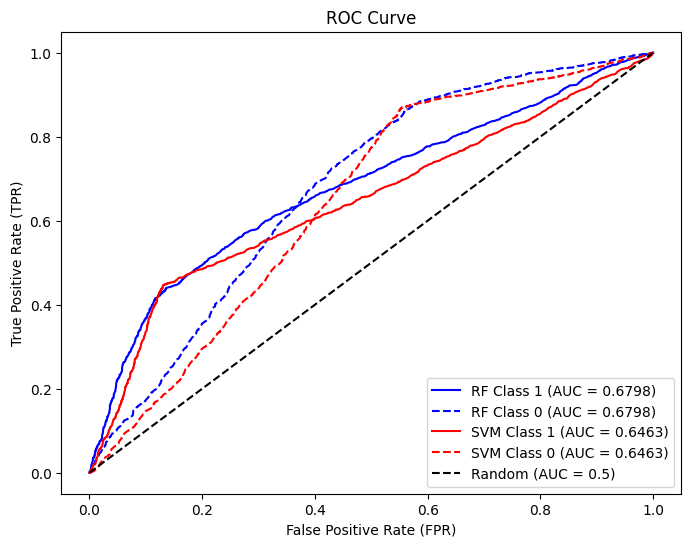

RF AUC Class 0: 0.679820
RF AUC Class 1: 0.679820
SVM AUC Class 0: 0.646276
SVM AUC Class 1: 0.646276


In [75]:
# Menggunakan cross-validation untuk mendapatkan probabilitas prediksi
rf_probs = cross_val_predict(rf_model_cv, X_train_final, y_train_final, cv=skf, method="predict_proba")
svm_probs = cross_val_predict(svm_model_cv, X_train_final, y_train_final, cv=skf, method="predict_proba")

# Hitung ROC dan AUC untuk kelas 0 dan kelas 1 pada Random Forest
rf_fpr_0, rf_tpr_0, _ = roc_curve(y_train_final, rf_probs[:, 0], pos_label=0)
rf_fpr_1, rf_tpr_1, _ = roc_curve(y_train_final, rf_probs[:, 1], pos_label=1)

rf_auc_0 = auc(rf_fpr_0, rf_tpr_0)
rf_auc_1 = auc(rf_fpr_1, rf_tpr_1)

# Hitung ROC dan AUC untuk kelas 0 dan kelas 1 pada SVM
svm_fpr_0, svm_tpr_0, _ = roc_curve(y_train_final, svm_probs[:, 0], pos_label=0)
svm_fpr_1, svm_tpr_1, _ = roc_curve(y_train_final, svm_probs[:, 1], pos_label=1)

svm_auc_0 = auc(svm_fpr_0, svm_tpr_0)
svm_auc_1 = auc(svm_fpr_1, svm_tpr_1)

# Plot ROC Curve
plt.figure(figsize=(8, 6))

# ROC untuk Random Forest
plt.plot(rf_fpr_1, rf_tpr_1, label=f"RF Class 1 (AUC = {rf_auc_1:.4f})", color="blue")
plt.plot(rf_fpr_0, rf_tpr_0, label=f"RF Class 0 (AUC = {rf_auc_0:.4f})", color="blue", linestyle="dashed")

# ROC untuk SVM
plt.plot(svm_fpr_1, svm_tpr_1, label=f"SVM Class 1 (AUC = {svm_auc_1:.4f})", color="red")
plt.plot(svm_fpr_0, svm_tpr_0, label=f"SVM Class 0 (AUC = {svm_auc_0:.4f})", color="red", linestyle="dashed")

# Plot garis diagonal (model random)
plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")

# Label dan judul
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Tampilkan plot
plt.show()

# Print ROC AUC values untuk masing-masing kelas
print(f"RF AUC Class 0: {rf_auc_0:.6f}")
print(f"RF AUC Class 1: {rf_auc_1:.6f}")
print(f"SVM AUC Class 0: {svm_auc_0:.6f}")
print(f"SVM AUC Class 1: {svm_auc_1:.6f}")

ROC AUC RFC & SVM FINAL

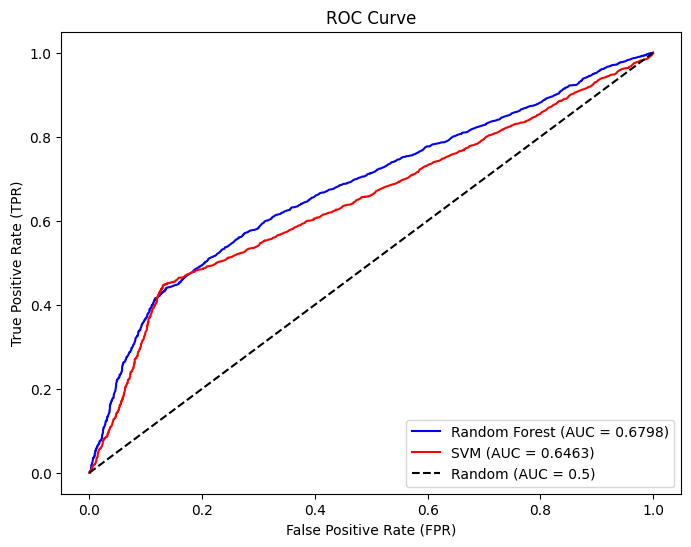

In [76]:
rf_probs = cross_val_predict(rf_model_cv, X_train_final, y_train_final, cv=skf, method="predict_proba")
svm_probs = cross_val_predict(svm_model_cv, X_train_final, y_train_final, cv=skf, method="predict_proba")

# Ambil probabilitas kelas positif (kolom indeks ke-1)
rf_fpr, rf_tpr, _ = roc_curve(y_train_final, rf_probs[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_train_final, svm_probs[:, 1])

# Hitung AUC
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(8, 6))

# Plot ROC untuk Random Forest
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})", color="blue")

# Plot ROC untuk SVM
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.4f})", color="red")

# Plot garis diagonal (model random)
plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")

# Label dan judul
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Tampilkan plot
plt.show()

In [74]:
df_no_outliers.to_csv('poli_jantung_labeled.csv', index=False)
print("Dataset berhasil disimpan sebagai poli_jantung_labeled.csv")

Dataset berhasil disimpan sebagai poli_jantung_labeled.csv
